In [2]:
# Initial notebook by Xishui
# Data analysis on site Sept 2024
    
import numpy as np
import matplotlib.pyplot as plt
# import glob
from scipy.fft import rfftfreq, rfft, irfft
from grand import ECEF, Geodetic, GRANDCS, LTP
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit
import os 
import datetime
import grand.dataio.root_trees as rt
plt.style.use("/home/olivier/GRAND/soft/l3.mplstyle")

# data_dir = "/home/olivier/GRAND/data/GP300/gp13/onsite/sept2024/"
#data_dir = "/home/olivier/GRAND/data/GP300/gp13/root/"
data_dir = "/home/olivier/GRAND/data/GP300/gp80/"


Welcome to JupyROOT 6.26/10


In [4]:
#flist = [data_dir + "GP13_20240913_124515_RUN133_MD_RAW_20Hz_ChanXYZ_20dB_13DUs_001_dat.root"]  # 20Hz everybody
#flist = [data_dir + "GP13_20240913_124600_RUN133_MD_RAW_20Hz_ChanXYZ_20dB_13DUs_002_dat.root"]  # 20Hz everybody
#flist = [data_dir + "GP13_20240914_101040_RUN0914_MD_20Hz_RAW_ChanXYZ_20dB_11DUs_2048_002_dat.root"]  # 20Hz everybody
#flist = [data_dir + "GP13_20240914_105351_RUN0914_MD_20dB_DU23_DU09_001_dat.root"] #DU9 before CC change
#flist = [data_dir + "GP13_20240914_112345_RUN0914_MD_20Hz_20dB_DU09_001_dat.root"]  # DU9 after CC change
#flist = [data_dir + "GP13_20240914_204853_RUN127_UD_RAW_ChanXYZ_20dB_11DUs_004_dat.root"]  #  First night after commissioning
#flist = [data_dir + "GP13_20240920_235546_RUN127_UD_RAW_ChanXYZ_20dB_10DUs_111.root"]  # Routine MD run
#flist = [data_dir + "GP13_20240920_190923_RUN127_UD_RAW_ChanXYZ_20dB_10DUs_069.root"] # Routine MD run
#flist = [data_dir + "GP13_20240917_121617_RUN127_UD_RAW_ChanXYZ_20dB_12DUs_201.root"]
#flist = [data_dir + "GP13_20240915_054842_RUN127_UD_RAW_ChanXYZ_20dB_12DUs_006.root"]
#flist = [data_dir + "GP13_20241029_071043_RUN133_MD_RAW_ChanXYZ_20dB_DU55_20hz_001_dat.root"]  # Initial DU55
#flist = [data_dir + "GP13_20241029_072940_RUN133_MD_RAW_ChanXYZ_20dB_DU93_20hz_001_dat.root"] # Initial DU93 
#flist = [data_dir + "GP13_20241029_073347_RUN133_MD_RAW_ChanXYZ_20dB_DU93_20hz_001_dat.root"] # Swap cables DU93
#flist = [data_dir + "GP13_20241029_080948_RUN133_MD_RAW_ChanXYZ_20dB_DU93_20hz_001_dat.root"] # Nut replacement
#flist = [data_dir + "GP13_20241029_082913_RUN133_MD_RAW_ChanXYZ_20dB_DU89_20hz_001_dat.root"] # Initial DU89  ==> 
#flist = [data_dir + "GP13_20241029_092647_RUN133_MD_RAW_ChanXYZ_20dB_DU55_20hz_001_dat.root"] # DU55 New LNA
#flist = [data_dir + "GP13_20241029_100225_RUN133_MD_RAW_ChanXYZ_20dB_DU74_20hz_001_dat.root"] # DU74 ref ==> OK
#flist = [data_dir + "GP13_20241029_100817_RUN133_MD_RAW_ChanXYZ_20dB_DU78_20hz_testDunhuang_001_dat.root"] # DU78 ref ==> dead
#flist = [data_dir + "GP13_20241029_102257_RUN133_MD_RAW_ChanXYZ_20dB_DU78_20hz_testDunhuang_001_dat.root"]
#flist = [data_dir + "GP13_20241029_061943_RUN125_MD_RAW_ChanXYZ_20dB_GP80_36DUs_10s_339_dat.root"]  # Long run (Ref 14)
#flist = [data_dir + "GP13_20241029_104118_RUN133_MD_RAW_ChanXYZ_20dB_DU14_20hz_testDunhuang_001_dat.root"] # DU14 New LNA
#flist = [data_dir + "GP13_20241030_053847_RUN133_MD_RAW_ChanXYZ_20dB_DU31_20hz_GPSTest_001_dat.root"] # DU31 after changing nut
#flist = [data_dir + "GP13_20241031_024948_RUN127_MD_RAW_ChanXYZ_20dB_DU86_DU89_20hz_dunhuangTest_001_dat.root"]
flist = [data_dir + "GP13_20241031_044229_RUN133_MD_RAW_ChanXYZ_20dB_10DUs_GP13_20hz_DunhuangTEST_002_dat.root"]
list_trigger_time = [] # Time of trigger in seconds
list_trigger_nano = [] # Time of trigger in seconds
list_traces_MD = []
list_traces = []
list_time_MD = []
list_du_id_MD = []
list_du_id = []
for fname in flist:
    root_file = rt.DataFile(fname)
    n = root_file.tadc.get_number_of_entries()
    for i in range(n):
      if i/100 == int(i/100):
        print(i,n)
        
      root_file.tadc.get_entry(i)
      #print(i,root_file.tadc.trigger_pattern_10s)
      if np.all(root_file.tadc.trigger_pattern_calibration):  # 20Hz data
      #if np.all(root_file.tadc.trigger_pattern_10s):  # 10s data <=> MD
        # MD data
        #print("MD data in")
        list_time_MD.append(root_file.tadc.du_seconds[0])
        list_du_id_MD.append(root_file.tadc.du_id[0])
        _traces = []
        _traces.append(root_file.tadc.trace_ch[0][0])
        _traces.append(root_file.tadc.trace_ch[0][1])
        _traces.append(root_file.tadc.trace_ch[0][2])
        _traces.append(root_file.tadc.trace_ch[0][3])
        list_traces_MD.append(_traces)
    
# list_trigger_time should already be sorted in the root file
# Convert list to np.array
list_time_MD = np.array(list_time_MD)
list_du_id_MD = np.array(list_du_id_MD)
list_traces_MD = np.array(list_traces_MD)
du_MD_list = np.unique(list_du_id_MD)


0 4014
100 4014
200 4014
300 4014
400 4014
500 4014
600 4014
700 4014
800 4014
900 4014
1000 4014
1100 4014
1200 4014
1300 4014
1400 4014
1500 4014
1600 4014
1700 4014
1800 4014
1900 4014
2000 4014
2100 4014
2200 4014
2300 4014
2400 4014
2500 4014
2600 4014
2700 4014
2800 4014
2900 4014
3000 4014
3100 4014
3200 4014
3300 4014
3400 4014
3500 4014
3600 4014
3700 4014
3800 4014
3900 4014
4000 4014


In [5]:
# Check infos
dur = (np.max(list_time_MD)-np.min(list_time_MD))/1e9
print("MD data on DUs:",du_MD_list)
print("MD data duration (s) =",dur)
for target_du in du_MD_list:
    print(target_du,":",np.sum(list_du_id_MD == target_du),'events')

MD data on DUs: [1018 1023 1038 1040 1043 1045 1048 1058 1059 1065]
MD data duration (s) = 2e-08
1018 : 401 events
1023 : 402 events
1038 : 401 events
1040 : 401 events
1043 : 401 events
1045 : 402 events
1048 : 402 events
1058 : 401 events
1059 : 402 events
1065 : 401 events


In [6]:
# Compute mean FFT
mfft = np.zeros((len(du_MD_list),4,int(len(list_traces_MD[0,0,:])/2)+1))
afft_all = []
for i,target_du in enumerate(du_MD_list):
    print(target_du)
    dumask = list_du_id_MD == target_du
    afft = abs(rfft(list_traces_MD[dumask],axis=2))
    afft_all.append(afft)
    mfft[i] = np.mean(afft,axis=0)

npts = len(list_traces_MD[dumask,0,:][0])
freq = rfftfreq(npts,2e-3)  # in MHz with 2ns seperation given in mus
print(np.shape(mfft))

1018
1023
1038
1040
1043
1045
1048
1058
1059
1065
(10, 4, 513)


In [5]:
# Save some data for comparison
target_du = 1074
iDU = np.argwhere(du_MD_list == target_du)[0][0]
sauv_fft = mfft[i,:,:]
print("Saved data of DU",target_du,"in run",flist[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

# Plot mean FFT

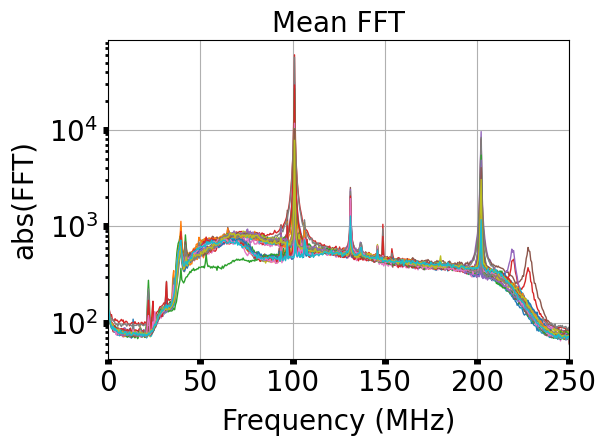

In [11]:
plt.figure()
tit = "Mean FFT"
plt.title(tit)
lab = ['Float','X','Y','Z']
for i,target_du in enumerate(du_MD_list):
    #if target_du != 1086:
    #    continue
    
    for ich in range(1,4):
        #plt.figure(ich+1)
        #plt.title(lab[ich])
        lab = "Ch"+str(ich)
        plt.semilogy(freq,mfft[i,ich,:],lw = 1, label=lab)
        plt.xlabel("Frequency (MHz)")
        plt.ylabel("abs(FFT)")
        #plt.legend(loc='best')
#plt.xlim(0,100)
#plt.axvline(118.9,ls='--')
        plt.xlim([0,250])
        plt.grid(True)
#plt.legend(loc='best')

## Comparison

In [ ]:
target_du = 1078
iDU = np.argwhere(du_MD_list == target_du)[0][0]
ich = 2
for i in [iDU]:
  plt.semilogy(freq,sauv_fft[3,:],lw = 1, label="DU1074ChZ_ref")
  #plt.semilogy(freq,sauv_fft[3,:],lw = 1, label="DU"+str(target_du)+"Ch3_ini")
  plt.semilogy(freq,mfft[i,1,:],lw = 1, label="DU"+str(target_du)+"Ch1")
  plt.semilogy(freq,mfft[i,3,:],lw = 1, label="DU"+str(target_du)+"Ch3")
    

plt.xlabel("Frequency (MHz)")
plt.ylabel("abs(FFT)")
plt.legend(loc='best')

# FFT with time

In [ ]:
target_du = 1093
iDU = np.argwhere(du_MD_list == target_du)[0][0]
step = 10

plt.figure()
tit = "Mean FFT - DU"+str(target_du)
plt.title(tit)
lab = ['Filt Y','X','Y','Z']
afft = afft_all[iDU]
nevts = np.shape(afft)[0]
for j in range(0,nevts,step):
    for ich in range(0,4):
        plt.figure(ich+1)
        #lab = "Ch"+str(ich)
        plt.semilogy(freq,np.mean(afft[j:j+step,ich,:],axis=0),lw = 1)

for ich in range(0,4):
    plt.figure(ich+1)
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("abs(FFT)")
#plt.axvline(118.9,ls='--')
    plt.xlim([100,200])
    plt.grid()
    plt.title(lab[ich])
#    plt.legend(loc="best")